In [1]:
import pandas as pd

In [2]:
# read csv file
filename = "Project_1_dataset_01_01_2022.csv"
df = pd.read_csv(filename)

In [3]:
# check the data
df.head()

,Unnamed: 0,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,590,Having made a massive impact in Saudi Arabia w...,Having made a massive impact in Saudi Arabia w...,"['singhs', 'rooting', 'cool', 'saudi', 'style'...",NaN,[],https://www.msn.com/en-in/entertainment/other/...,cricket,sports
1,388,Cricket is all about the emotional rollercoast...,"No matter which team fans hope to win, every s...","['wants', 'fans', 'finals', 'cup', 'win', 'tou...",NaN,[],https://www.prnewswire.com:443/news-releases/c...,cricket,sports
2,423,New Zealand announces back-to-back tours next ...,New Zealand announces back-to-back tours next ...,"['test', 'west', 'tour', 'zealand', 'world', '...",2021-12-20 00:00:00,[],https://www.aljazeera.com/news/2021/12/20/cric...,cricket,sports
3,563,It's not the first time cricket fans in the co...,Billed as one of the pre-tournament favourites...,"['qualify', 'afghanistan', 'cup', 'world', 'ze...",NaN,[],https://www.msn.com/en-in/news/other/t20-world...,cricket,sports
4,634,An employee works on a computer terminal again...,"REUTERS/Sivaram VBENGALURU, Oct 11 (Reuters Br...","['success', 'tech', 'startup', 'talent', 'onli...",2021-10-11 00:00:00,['Una Galani'],https://www.reuters.com/breakingviews/india-in...,cricket,sports


## Question1

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# create column count which stores length of alpha numeric characters
df['count'] =  df['full_text'].apply(lambda x: sum(char.isalnum() for char in x))

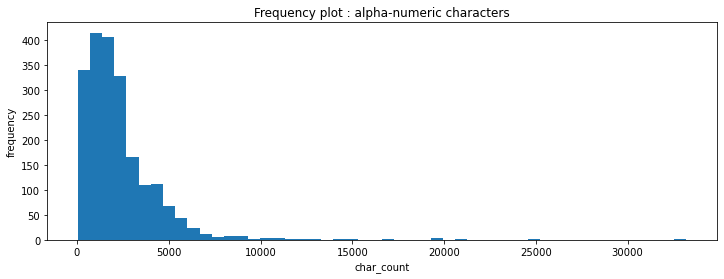

In [6]:

# histogram: alpha-numeric characters in document
plt.figure(figsize=(12,4))
plt.hist(df['count'],50)
plt.xlabel('char_count')
plt.ylabel('frequency')
plt.title("Frequency plot : alpha-numeric characters")
# plt.show()
plt.savefig('plot_1.png')
df = df.drop('count',axis=1)   ## drop new column count after creating the histogram

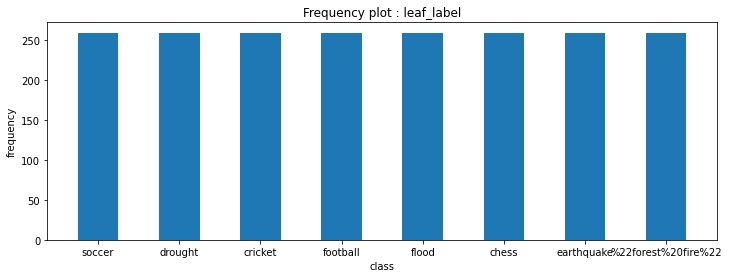

In [7]:
# histogram: leaf_label
leaf_label_counts = pd.DataFrame(df['leaf_label'].value_counts()).reset_index()

plt.figure(figsize=(12,4))
plt.bar(leaf_label_counts['index'],leaf_label_counts['leaf_label'] ,0.5)
plt.xlabel('class')
plt.ylabel('frequency')
plt.title("Frequency plot : leaf_label")
plt.savefig('plot_2.png')

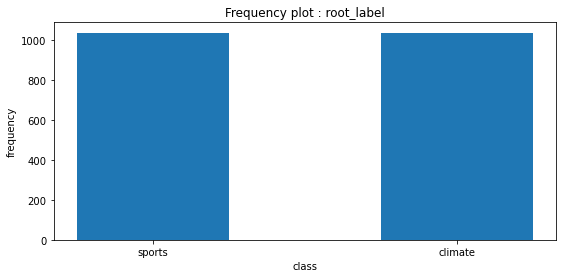

In [8]:
# histogram: root_label
root_label_counts = pd.DataFrame(df['root_label'].value_counts()).reset_index()

plt.figure(figsize=(9,4))
plt.bar(root_label_counts['index'],root_label_counts['root_label'] ,0.5)
plt.xlabel('class')
plt.ylabel('frequency')
plt.title("Frequency plot : root_label")
plt.savefig('plot_3.png')


In [9]:
print("sample number:{}".format(df.shape[0]))
print("column number:{}".format(df.shape[1]))

sample number:2072
column number:9


## Question2

In [10]:
import numpy as np
import random 

np.random.seed(42)
random.seed(42)

In [11]:
from sklearn.model_selection import train_test_split

def question2(train,test):
    
    train_num = train.shape[0]
    test_num = test.shape[0]
    return train_num,test_num

train, test = train_test_split(df, test_size=0.2, random_state = 42)

train_num,test_num = question2(train,test)
print("train number:{}".format(train_num))
print("test number:{}".format(test_num))

train number:1657
test number:415


## Question3

In [12]:
## Import libraries
import re
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import nltk
from nltk import pos_tag
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
#nltk.download('stopwords' )

import string
from string import punctuation

stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')

In [13]:
def clean(text):
    '''
    Helps remove many HTML artefacts from the crawler's output.
    '''
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

def clean_data(data):
    for index,row in data.iterrows():
        row['full_text'] = clean(row['full_text'])
    return data

In [14]:
# #### IMP: still need to determine the right order of cleaning steps
# ## Right now the order is --> clean html, remove_punctuation, lemmatize, remove digit, stopwords and chars

# ## Building 6 analyzers for [clean, no clean]*[lemmatize, stem, no compression] combinations


# combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
# wnl = nltk.wordnet.WordNetLemmatizer()
# stemmer = nltk.stem.PorterStemmer()
# analyzer = CountVectorizer().build_analyzer()

# def penn2morphy(penntag):
#     """ 
#     Converts Penn Treebank tags to WordNet. 
#     """
#     morphy_tag = {'NN':'n', 'JJ':'a',
#                   'VB':'v', 'RB':'r'}
#     try:
#         return morphy_tag[penntag[:2]]
#     except:
#         return 'n' 

# def lemmatize_sent(list_word): 
#     '''
#     Returns lemmatized set of tokens with pos tagging
#     '''
#     return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
#             for word, tag in pos_tag(list_word)]

# def clean_tokens_lemma (tokens: list):
#     '''
#     Cleans set of tokens at sentence level by applying lemmatization at sentence level
#     '''
#     lower_txt = [token.lower() for token in tokens]
#     lemmatize_tokens = lemmatize_sent(lower_txt) 
#     remove_words = [token for token in lemmatize_tokens if (not token.isdigit())\
#                      and (token not in combined_stopwords) and (len(token)>1)]
#     return remove_words

# def doc_tokens_lemma (doc):
#     '''
#     Split the document at sentence level, clean it and return clean set of tokens at doc level
#     '''
#     doc = clean(doc)
#     list_sentences = sent_tokenize(doc)
#     doc_tokens = []
#     for sentence in list_sentences:
#         sentence = sentence.translate(str.maketrans('', '', string.punctuation))
#         tokens = nltk.word_tokenize(sentence)
#         tokens = clean_tokens_lemma(tokens)
#         doc_tokens.extend(tokens)
# #     print(doc_tokens)
#     return (word for word in doc_tokens)     

# def doc_tokens_lemma_woClean (doc):
#     '''
#     Perform lemmatization without any text cleaning
#     '''
#     list_sentences = sent_tokenize(doc)
#     doc_tokens = []
#     for sentence in list_sentences:
#         tokens = nltk.word_tokenize(sentence)
#         tokens = lemmatize_sent(tokens)
#         doc_tokens.extend(tokens)
# #     print(doc_tokens)
#     return (word for word in doc_tokens)   

# def doc_tokens_stem (doc):
#     '''
#     Clean full text using stemming. This function does not require split at sentence level.
#     '''
#     doc = clean(doc)
#     doc = doc.translate(str.maketrans('', '', string.punctuation))
#     tokens = nltk.word_tokenize(doc)
#     lower_txt = [token.lower() for token in tokens]
#     stem_tokens = [stemmer.stem(token) for token in lower_txt] 
#     remove_words = [token for token in stem_tokens if (not token.isdigit())\
#                      and (token not in combined_stopwords) and (len(token)>1)]
#     return (word for word in remove_words)

# def doc_tokens_stem_woClean (doc):
#     '''
#     Clean full text using stemming. This function does not require split at sentence level.
#     '''
#     tokens = nltk.word_tokenize(doc)
#     lower_txt = [token.lower() for token in tokens]
#     stem_tokens = [stemmer.stem(token) for token in lower_txt] 
#     return (word for word in stem_tokens)
    
# def doc_tokens (doc):
#     '''
#     Clean full text without any stemming or lemmatization
#     '''
#     doc = clean(doc)
#     doc = doc.translate(str.maketrans('', '', string.punctuation))
#     tokens = nltk.word_tokenize(doc)
#     lower_txt = [token.lower() for token in tokens]
#     remove_words = [token for token in lower_txt if (not token.isdigit())\
#                      and (token not in combined_stopwords) and (len(token)>1)]
#     return (word for word in remove_words)
    
# def doc_tokens_woClean (doc):
#     '''
#     Clean full text using stemming. This function does not require split at sentence level.
#     '''
#     tokens = nltk.word_tokenize(doc)
#     lower_txt = [token.lower() for token in tokens]
#     return (word for word in lower_txt)

In [15]:
#### IMP: still need to determine the right order of cleaning steps
## Right now the order is --> clean html, remove_punctuation, lemmatize, remove digit, stopwords and chars

## Building 6 analyzers for [clean, no clean]*[lemmatize, stem, no compression] combinations


combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
wnl = nltk.wordnet.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def penn2morphy(penntag):
    """ 
    Converts Penn Treebank tags to WordNet. 
    """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def lemmatize_sent(list_word): 
    '''
    Returns lemmatized set of tokens with pos tagging
    '''
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

def stem_rmv_punc(doc): # this should have been at the sentence-level because the pos-tag performs best at sentence-level
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

def clean_tokens_lemma (tokens: list):
    '''
    Cleans set of tokens at sentence level by applying lemmatization at sentence level
    '''
    lower_txt = [token.lower() for token in tokens]
    remove_words = [token for token in lower_txt if (not token.isdigit())\
                     and (token not in combined_stopwords) and (len(token)>1)]
    lemmatize_tokens = lemmatize_sent(remove_words) 
    return lemmatize_tokens

def doc_tokens_lemma (doc):
    '''
    Split the document at sentence level, clean it and return clean set of tokens at doc level
    '''
    doc = clean(doc)
    list_sentences = sent_tokenize(doc)
    doc_tokens = []
    for sentence in list_sentences:
        sentence = sentence.translate(str.maketrans('', '', string.punctuation))
        tokens = nltk.word_tokenize(sentence)
        tokens = clean_tokens_lemma(tokens)
        doc_tokens.extend(tokens)
#     print(doc_tokens)
    return (word for word in doc_tokens)     

def doc_tokens_lemma_woClean (doc):
    '''
    Perform lemmatization without any text cleaning
    '''
    list_sentences = sent_tokenize(doc)
    doc_tokens = []
    for sentence in list_sentences:
        tokens = nltk.word_tokenize(sentence)
        tokens = lemmatize_sent(tokens)
        doc_tokens.extend(tokens)
#     print(doc_tokens)
    return (word for word in doc_tokens)   

def doc_tokens_stem (doc):
    '''
    Clean full text using stemming. This function does not require split at sentence level.
    '''
    doc = clean(doc)
    doc = doc.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(doc)
    lower_txt = [token.lower() for token in tokens]
    remove_words = [token for token in lower_txt if (not token.isdigit())\
                     and (token not in combined_stopwords) and (len(token)>1)]
    stem_tokens = [stemmer.stem(token) for token in remove_words] 
    return (word for word in stem_tokens)

def doc_tokens_stem_woClean (doc):
    '''
    Clean full text using stemming. This function does not require split at sentence level.
    '''
    tokens = nltk.word_tokenize(doc)
    lower_txt = [token.lower() for token in tokens]
    stem_tokens = [stemmer.stem(token) for token in lower_txt] 
    return (word for word in stem_tokens)
    
def doc_tokens (doc):
    '''
    Clean full text without any stemming or lemmatization
    '''
    doc = clean(doc)
    doc = doc.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(doc)
    lower_txt = [token.lower() for token in tokens]
    remove_words = [token for token in lower_txt if (not token.isdigit())\
                     and (token not in combined_stopwords) and (len(token)>1)]
    return (word for word in remove_words)
    
def doc_tokens_woClean (doc):
    '''
    Clean full text using stemming. This function does not require split at sentence level.
    '''
    tokens = nltk.word_tokenize(doc)
    lower_txt = [token.lower() for token in tokens]
    return (word for word in lower_txt)

In [16]:
## stemming vs lemmatization

In [17]:
count_vectorizer_lemma = CountVectorizer(min_df=3, stop_words='english', analyzer=doc_tokens_lemma, max_df=0.7)
X_train_counts = count_vectorizer_lemma.fit_transform(train['full_text'])
print("Lemmatization dictionary size is: ", X_train_counts.shape[1])

Lemmatization dictionary size is:  10614


In [18]:
count_vectorizer_stem = CountVectorizer(min_df=3, stop_words='english', analyzer=doc_tokens_stem, max_df=0.7)
X_train_counts = count_vectorizer_stem.fit_transform(train['full_text'])
print("Stemming dictionary size is: ", X_train_counts.shape[1])

Stemming dictionary size is:  9351


In [19]:
# impact of minimum data frequency on tf-idf

In [20]:
min_dfs = range(1,5)
for min_df in min_dfs:
    count_vectorizer1 = CountVectorizer(min_df=min_df, stop_words='english', analyzer=doc_tokens_lemma, max_df=0.7)
    X_train_counts1 = count_vectorizer1.fit_transform(train['full_text'])
    
    transformer1 = TfidfTransformer()
    X_train_tfidf = transformer1.fit_transform(X_train_counts1)
    
    print(X_train_tfidf.shape)

(1657, 34414)
(1657, 15324)
(1657, 10614)
(1657, 8331)


In [21]:
min_dfs = range(1,5)
for min_df in min_dfs:
    count_vectorizer1 = CountVectorizer(min_df=min_df, stop_words='english', analyzer=doc_tokens_stem, max_df=0.7)
    X_train_counts1 = count_vectorizer1.fit_transform(train['full_text'])
    
    transformer1 = TfidfTransformer()
    X_train_tfidf = transformer1.fit_transform(X_train_counts1)
    
    print(X_train_tfidf.shape)

(1657, 29305)
(1657, 13329)
(1657, 9351)
(1657, 7434)


In [22]:
## tf-idf processed train and test

In [23]:
count_vectorizer = CountVectorizer(min_df=3, stop_words='english', analyzer=doc_tokens_lemma, max_df=0.7)
transformer = TfidfTransformer()

X_train_counts = count_vectorizer.fit_transform(train['full_text'])
X_train_tfidf = transformer.fit_transform(X_train_counts)

X_test_counts = count_vectorizer.transform(test['full_text'])
X_test_tfidf = transformer.transform(X_test_counts)

print('TF-IDF processed train data shape:', X_train_tfidf.shape)
print('TF-IDF processed test data shape:', X_test_tfidf.shape)

TF-IDF processed train data shape: (1657, 10614)
TF-IDF processed test data shape: (415, 10614)


## Question 4

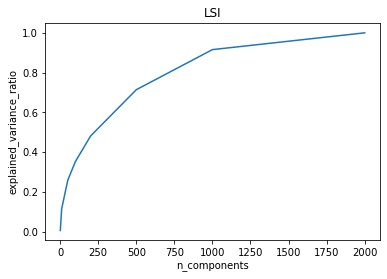

In [24]:
from sklearn.decomposition import TruncatedSVD
# Run LSI for various k values
k_list = [1,10,50,100,200,500,1000,2000]
explained_ratio = []
for k in k_list:
    svd = TruncatedSVD(n_components=k, n_iter = 20, random_state=42)
    svd.fit(X_train_tfidf)
    # print(svd.explained_variance_ratio_.sum())
    explained_ratio.append(svd.explained_variance_ratio_.sum())

# plotting the explained variance ratio across number of components
plt.plot(k_list, explained_ratio)
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio')
plt.title('LSI')
plt.show()

In [25]:
# reconstruction residual

In [26]:
SVD_50 = TruncatedSVD(n_components=50, n_iter = 20, random_state=42)
X_train_lsi = SVD_50.fit_transform(X_train_tfidf)
X_test_lsi = SVD_50.transform(X_test_tfidf)


In [27]:
## For NMF
from sklearn.decomposition import NMF

NMF_50 = NMF(n_components=50, max_iter = 500, init='random', random_state=42)
X_train_nmf = NMF_50.fit_transform(X_train_tfidf)
X_test_nmf = NMF_50.transform(X_test_tfidf)

In [28]:
VT = SVD_50.components_
X_train_svd_recons = np.matmul(X_train_lsi, VT)
norm_train = ((X_train_tfidf.toarray() - X_train_svd_recons)**2).sum(axis = None)
mse_train = ((X_train_tfidf.toarray() - X_train_svd_recons)**2).mean(axis = None)
X_test_svd_recons = np.matmul(X_test_lsi, VT)
norm_test = ((X_test_tfidf.toarray() - X_test_svd_recons)**2).sum(axis = None)
mse_test = ((X_test_tfidf.toarray() - X_test_svd_recons)**2).mean(axis = None)
print(mse_train, mse_test, norm_train, norm_test)

6.766065165465466e-05 6.887313300219922e-05 1189.97480958977 303.37306497941717


In [29]:
H = NMF_50.components_
X_train_nmf_recons = np.matmul(X_train_nmf, H)
norm_train = ((X_train_tfidf.toarray() - X_train_nmf_recons)**2).sum(axis = None)
mse_train = ((X_train_tfidf.toarray() - X_train_nmf_recons)**2).mean(axis = None)
X_test_nmf_recons = np.matmul(X_test_nmf, H)
norm_test = ((X_test_tfidf.toarray() - X_test_nmf_recons)**2).sum(axis = None)
mse_test = ((X_test_tfidf.toarray() - X_test_nmf_recons)**2).mean(axis = None)
print(mse_train, mse_test, norm_train, norm_test)


6.88544602260256e-05 6.964009639149524e-05 1210.9707960702822 306.75139298622213


Why?

Both NMF and SVD represent a set of vectors in a given basis. The basis in NMF is composed of vectors with positive elements while the basis in SVD can have positive or negative values.

The difference then is that NMF reconstructs each vector as a positive summation of the basis vectors, in other words you take a little of each vector in the basis to reconstruct your data.

In SVD the data is modeled as a linear combination of the basis you can add or substract vectors as needed.

## Question 5

In [30]:
## Data pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()

## train model
y_train = label_encoder.fit_transform(train['root_label'])
y_test = label_encoder.fit_transform(test['root_label'])

### Train SVM model

In [31]:
# train linear SVM

from sklearn.svm import SVC

svm_hard = SVC(kernel='linear', C=1000, random_state=42)
svm_soft = SVC(kernel='linear', C=0.0001, random_state=42)

svm_hard.fit(X_train_lsi, y_train)
svm_soft.fit(X_train_lsi, y_train)

SVC(C=0.0001, kernel='linear', random_state=42)

In [32]:
# plot ROC
from sklearn import metrics

def plot_ROC(fpr,tpr):
    fig = plt.figure()
    roc_auc = metrics.auc(fpr,tpr)
    plt.plot(fpr,tpr,label="area under curve = %0.3f" %roc_auc)
    plt.xlabel('False positive rate',fontsize=10)
    plt.ylabel('True positive rate',fontsize=10)
    plt.grid()
    plt.legend()
    plt.savefig('plot.png')
    return roc_auc
    

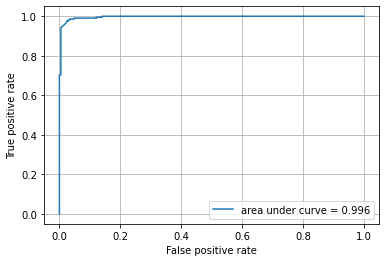

In [33]:
# plot ROC curve for svm_hard
score_hard = svm_hard.decision_function(X_test_lsi)
fpr_hard,tpr_hard,_ = metrics.roc_curve(y_test,score_hard)
auc_hard = plot_ROC(fpr_hard,tpr_hard)

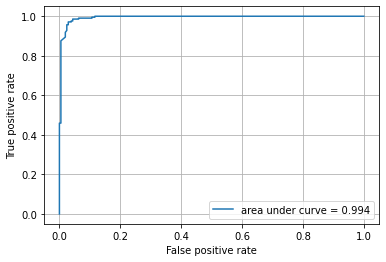

In [34]:
# plot ROC curve for svm_hard
score_soft = svm_soft.decision_function(X_test_lsi)
fpr_soft,tpr_soft,_ = metrics.roc_curve(y_test,score_soft)
auc_soft = plot_ROC(fpr_soft,tpr_soft)

In [35]:
# comparison
if auc_hard > auc_soft:
    print('SVM_hard is better')
else:
    print('SVM_soft is better')

SVM_hard is better


In [36]:
svm_veryHard = SVC(kernel='linear', C=100000, random_state=42)
svm_veryHard.fit(X_train_lsi, y_train)

SVC(C=100000, kernel='linear', random_state=42)

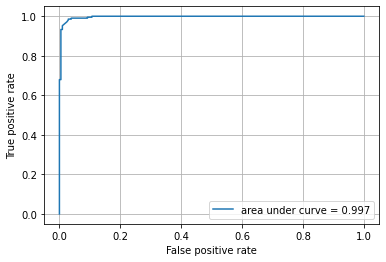

In [37]:
# plot ROC curve for svm_veryHard
score_veryHard = svm_veryHard.decision_function(X_test_lsi)
fpr_veryHard,tpr_veryHard,_ = metrics.roc_curve(y_test,score_veryHard)
auc_veryHard = plot_ROC(fpr_veryHard,tpr_veryHard)

In [38]:
def evaluation(classifier,test_data,y_test):
    y_test_pred = classifier.predict(test_data)
    print('-'*20)
    print("Confusion matrix on test set is: ")
    print(metrics.confusion_matrix(y_test, y_test_pred))
    print('-'*20)
    print('-'*20)
    print("Performance metrics on test set is: ")
    print ("Precision is: ", metrics.precision_score(y_test, y_test_pred))
    print ("Recall is: ", metrics.recall_score(y_test, y_test_pred))
    print ("Accuracy is: ", metrics.accuracy_score(y_test, y_test_pred))
    print ("F1 score is: ", metrics.f1_score(y_test, y_test_pred))
    print('-'*20)

In [39]:
print("Performance of SVM hard")
print('_' * 40)
evaluation(svm_hard,X_test_lsi,y_test)
print('_' * 60)
print("Performance of SVM soft")
print('_' * 40)
evaluation(svm_soft,X_test_lsi,y_test)

Performance of SVM hard
________________________________________
--------------------
Confusion matrix on test set is: 
[[199   7]
 [  3 206]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9671361502347418
Recall is:  0.9856459330143541
Accuracy is:  0.9759036144578314
F1 score is:  0.976303317535545
--------------------
____________________________________________________________
Performance of SVM soft
________________________________________
--------------------
Confusion matrix on test set is: 
[[206   0]
 [209   0]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.0
Recall is:  0.0
Accuracy is:  0.4963855421686747
F1 score is:  0.0
--------------------


/Users/reemakumari/.conda/envs/kaggle/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
print("Performance of Very hard SVM")
print('_' * 40)
evaluation(svm_veryHard,X_test_lsi,y_test)

Performance of Very hard SVM
________________________________________
--------------------
Confusion matrix on test set is: 
[[199   7]
 [  3 206]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9671361502347418
Recall is:  0.9856459330143541
Accuracy is:  0.9759036144578314
F1 score is:  0.976303317535545
--------------------


### Use cross-validation to choose $\gamma$

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

def cross_validate(classifier, train, label):
    avg_score = []

    for k in range(-3, 7):
        classifier.set_params(C=10**k).fit(train, label)
        cv = KFold(n_splits=5, random_state=42,shuffle=True)
        scores = cross_val_score(classifier, train, label, cv=cv, scoring='accuracy', n_jobs = -1)
    
        print('-'*20,'C =',10**k,'-'*20)
        print(scores)
        print(np.average(scores))
        avg_score.append(np.average(scores))

    max_score = np.max(avg_score)
    index = avg_score.index(max_score)
    c_idx = [x for x in range(-3,7)][index]
    print('-'*20,'Result','-'*20)
    print('The best classifier is when C =', 10**c_idx)
    print('Average Accuracy is:', max_score)
    
    return classifier.set_params(C=10**c_idx).fit(train,label)

svm_best = cross_validate(SVC(kernel='linear', random_state=42), X_train_lsi, y_train)


-------------------- C = 0.001 --------------------
[0.47289157 0.48795181 0.50151057 0.46223565 0.50151057]
0.4852200342154115
-------------------- C = 0.01 --------------------
[0.47289157 0.48795181 0.50151057 0.46223565 0.50151057]
0.4852200342154115
-------------------- C = 0.1 --------------------
[0.96084337 0.94879518 0.9305136  0.9244713  0.93655589]
0.9402358679430713
-------------------- C = 1 --------------------
[0.96084337 0.94879518 0.94561934 0.92749245 0.95166163]
0.9468823936228297
-------------------- C = 10 --------------------
[0.96987952 0.96385542 0.95770393 0.93353474 0.95468278]
0.9559312779820187
-------------------- C = 100 --------------------
[0.96385542 0.95783133 0.95770393 0.94259819 0.95166163]
0.9547300986423034
-------------------- C = 1000 --------------------
[0.96084337 0.94578313 0.96374622 0.94561934 0.93957704]
0.9511138208422816
-------------------- C = 10000 --------------------
[0.95783133 0.94277108 0.95770393 0.93655589 0.93655589]
0.946283

##### The best $\gamma$ for SVM is c = 10 

auc_best:0.9940


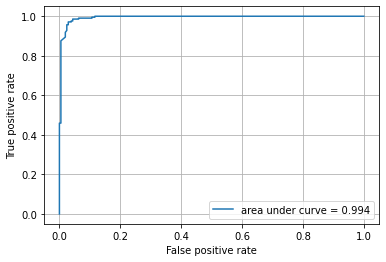

In [42]:
# plot ROC curve for svm_best
svm_best_train = SVC(kernel='linear', C=10, random_state=42)
svm_best_train.fit(X_train_lsi, y_train)
score_best = svm_best.decision_function(X_test_lsi)
fpr_best,tpr_best,_ = metrics.roc_curve(y_test,score_best)
auc_best = plot_ROC(fpr_soft,tpr_soft)
print("auc_best:%0.4f" % auc_best)

In [43]:
## evaluate this svm_best model
print("Performance of SVM soft")
print('_' * 40)
evaluation(svm_best,X_test_lsi,y_test)


Performance of SVM soft
________________________________________
--------------------
Confusion matrix on test set is: 
[[199   7]
 [  3 206]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9671361502347418
Recall is:  0.9856459330143541
Accuracy is:  0.9759036144578314
F1 score is:  0.976303317535545
--------------------


## Question 6

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logistic = LogisticRegression(penalty = 'none',solver = 'saga', max_iter=10000)
logistic.fit(X_train_lsi, y_train)


y_test_pred = logistic.predict(X_test_lsi)


auc_best:0.9940


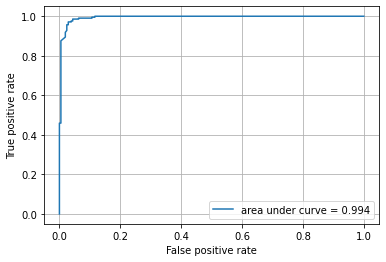

In [45]:
# plot ROC curve for logistic regression
y_test_pred_prob = logistic.predict_proba(X_test_lsi)[::,1]
fpr_best,tpr_best,_ = metrics.roc_curve(y_test,y_test_pred_prob)
auc_best = plot_ROC(fpr_soft,tpr_soft)
print("auc_best:%0.4f" % auc_best)

In [46]:
print("Performance of Logistic regression without regularisation")
print('_' * 40)
evaluation(logistic,X_test_lsi,y_test)

Performance of Logistic regression without regularisation
________________________________________
--------------------
Confusion matrix on test set is: 
[[199   7]
 [  3 206]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9671361502347418
Recall is:  0.9856459330143541
Accuracy is:  0.9759036144578314
F1 score is:  0.976303317535545
--------------------


In [47]:
## find optimal regularisation strength for L1 and L2 regularisation

In [48]:
def cross_validate_logistic(classifier, train, label):
    avg_score = []

    for k in range(-4, 5):
        classifier.set_params(C=10**k).fit(train, label)
        cv = KFold(n_splits=5, random_state=42,shuffle=True)
        scores = cross_val_score(classifier, train, label, cv=cv, scoring='accuracy', n_jobs = -1)
    
        print('-'*20,'C =',10**k,'-'*20)
        print(scores)
        print(np.average(scores))
        avg_score.append(np.average(scores))

    max_score = np.max(avg_score)
    index = avg_score.index(max_score)
    c_idx = [x for x in range(-4,5)][index]
    print('-'*20,'Result','-'*20)
    print('The best classifier is when C =', 10**c_idx)
    print('Average Accuracy is:', max_score)
    
    return classifier.set_params(C=10**c_idx).fit(train,label)




In [49]:
logisticL1_best = cross_validate_logistic(LogisticRegression(penalty = 'l1', solver='saga', max_iter=10000), X_train_lsi, y_train)



-------------------- C = 0.0001 --------------------
[0.47289157 0.48795181 0.49848943 0.46223565 0.49848943]
0.48401157500091
-------------------- C = 0.001 --------------------
[0.52710843 0.48795181 0.49848943 0.46223565 0.49848943]
0.49485494849488587
-------------------- C = 0.01 --------------------
[0.52710843 0.48795181 0.50151057 0.46223565 0.49848943]
0.49545917810213663
-------------------- C = 0.1 --------------------
[0.9186747  0.93072289 0.918429   0.88217523 0.88821752]
0.9076438685254613
-------------------- C = 1 --------------------
[0.96686747 0.96385542 0.96676737 0.93655589 0.93957704]
0.9547246387362136
-------------------- C = 10 --------------------
[0.96987952 0.96987952 0.96676737 0.95166163 0.95468278]
0.962574163724384
-------------------- C = 100 --------------------
[0.96987952 0.95180723 0.96072508 0.95166163 0.93957704]
0.9547300986423032
-------------------- C = 1000 --------------------
[0.96686747 0.95180723 0.96072508 0.95166163 0.94259819]
0.954731

In [50]:
logisticL2_best = cross_validate_logistic(LogisticRegression(penalty = 'l2', solver='saga', max_iter=10000), X_train_lsi, y_train)



-------------------- C = 0.0001 --------------------
[0.47289157 0.48795181 0.50151057 0.46223565 0.50151057]
0.4852200342154115
-------------------- C = 0.001 --------------------
[0.47289157 0.79819277 0.96374622 0.46223565 0.92749245]
0.7249117315182179
-------------------- C = 0.01 --------------------
[0.90963855 0.93975904 0.94561934 0.85800604 0.92145015]
0.9148946238124704
-------------------- C = 0.1 --------------------
[0.95783133 0.94879518 0.95166163 0.91540785 0.93655589]
0.9420503767335202
-------------------- C = 1 --------------------
[0.96686747 0.96686747 0.95770393 0.9305136  0.95770393]
0.9559312779820187
-------------------- C = 10 --------------------
[0.96987952 0.96686747 0.96676737 0.93655589 0.95166163]
0.9583463764423252
-------------------- C = 100 --------------------
[0.96987952 0.96084337 0.96676737 0.95166163 0.95770393]
0.9613711644159719
-------------------- C = 1000 --------------------
[0.97289157 0.95481928 0.96072508 0.94864048 0.94259819]
0.95593

In [51]:
print('Optimal regularisation strength for Logistic \
regression with L1 regularisation is 10')
print('Optimal regularisation strength for Logistic \
regression with L2 regularisation is 100')

Optimal regularisation strength for Logistic regression with L1 regularisation is 10
Optimal regularisation strength for Logistic regression with L2 regularisation is 100


In [52]:
# fit model on entire train dataset
logisticL1 = LogisticRegression(penalty = 'l1', solver='saga', max_iter=10000, C=10)
logisticL2 = LogisticRegression(penalty = 'l2', solver='saga', max_iter=10000, C=100)
logisticL1.fit(X_train_lsi,y_train)
logisticL2.fit(X_train_lsi,y_train)

LogisticRegression(C=100, max_iter=10000, solver='saga')

In [53]:
print("Performance of Logistic w/o regularisation is: ")
print('_' * 40)
evaluation(logistic,X_test_lsi,y_test)

Performance of Logistic w/o regularisation is: 
________________________________________
--------------------
Confusion matrix on test set is: 
[[199   7]
 [  3 206]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9671361502347418
Recall is:  0.9856459330143541
Accuracy is:  0.9759036144578314
F1 score is:  0.976303317535545
--------------------


In [54]:
print("Performance of Logistic w L1 regularisation is: ")
print('_' * 40)
evaluation(logisticL1,X_test_lsi,y_test)

Performance of Logistic w L1 regularisation is: 
________________________________________
--------------------
Confusion matrix on test set is: 
[[200   6]
 [  3 206]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9716981132075472
Recall is:  0.9856459330143541
Accuracy is:  0.9783132530120482
F1 score is:  0.9786223277909739
--------------------


In [55]:
print("Performance of Logistic w L2 regularisation is: ")
print('_' * 40)
evaluation(logisticL2,X_test_lsi,y_test)

Performance of Logistic w L2 regularisation is: 
________________________________________
--------------------
Confusion matrix on test set is: 
[[201   5]
 [  3 206]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.976303317535545
Recall is:  0.9856459330143541
Accuracy is:  0.980722891566265
F1 score is:  0.9809523809523809
--------------------


# Question 7

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

naivebayes = GaussianNB()
naivebayes.fit(X_train_lsi, y_train)


GaussianNB()

auc_best:0.9940


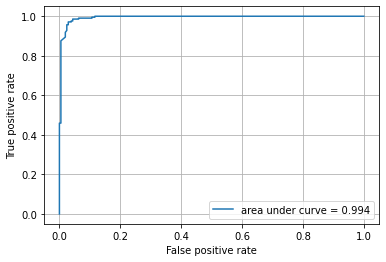

In [56]:
# plot ROC curve for logistic regression
y_test_pred_prob = naivebayes.predict_proba(X_test_lsi)[::,1]
fpr_best,tpr_best,_ = metrics.roc_curve(y_test,y_test_pred_prob)
auc_best = plot_ROC(fpr_soft,tpr_soft)
print("auc_best:%0.4f" % auc_best)

In [57]:
print("Performance of Naive Bayes classification")
print('_' * 40)
evaluation(naivebayes,X_test_lsi,y_test)

Performance of Naive Bayes classification
________________________________________
--------------------
Confusion matrix on test set is: 
[[197   9]
 [ 13 196]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9560975609756097
Recall is:  0.937799043062201
Accuracy is:  0.946987951807229
F1 score is:  0.9468599033816425
--------------------


## Question 8: Comparison between three classifiers

In [129]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

In [58]:
# prepare for pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=3, analyzer=doc_tokens_lemma)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', SVC(kernel='linear', C=100, random_state=42))
])

pipeline.fit(train.full_text, y_train)
predict = pipeline.predict(test.full_text)
print("accuracy:{}".format(metrics.accuracy_score(y_test, predict)))

accuracy:0.980722891566265


In [59]:
from sklearn.model_selection import GridSearchCV

# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
import joblib

In [46]:
cachedir = mkdtemp()
memory = joblib.Memory(location=cachedir, verbose=10)

pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(random_state=42)),
    ('clf', GaussianNB()),
],
memory=memory
)

param_grid = [
    {
        'vect': [
            CountVectorizer(min_df=3, stop_words='english'),
            CountVectorizer(min_df=3, analyzer=stem_rmv_punc),
            CountVectorizer(min_df=5, stop_words='english'),
            CountVectorizer(min_df=5, analyzer=stem_rmv_punc)
        ],
        'reduce_dim': [TruncatedSVD(n_components=5, random_state=42),
                       TruncatedSVD(n_components=50, random_state=42),
                       TruncatedSVD(n_components=500, random_state=42),
                       NMF(n_components=5, init='random', random_state=42),
                       NMF(n_components=50, init='random', random_state=42),
                       NMF(n_components=500, init='random', random_state=42)
        ],
        'clf': [SVC(kernel='linear', C=10, random_state=42),
                LogisticRegression(penalty='l1', C=10, random_state=42),
                LogisticRegression(penalty='l2', C=100, random_state=42),
                GaussianNB()
        ],
    }
]

In [ ]:
# grid search no clean data
grid = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid.fit(train.full_text, train_label)
rmtree(cachedir)

In [55]:
import pandas as pd

result = pd.DataFrame(grid.cv_results_)
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_vect,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.890214,0.016934,0.119382,0.012400,"SVC(C=100, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, random_state=42)","CountVectorizer(min_df=3, stop_words='english')","{'clf': SVC(C=100, kernel='linear', random_sta...",0.939759,0.915663,0.921450,0.939577,0.903323,0.923954,0.014103,46
1,28.847751,0.916071,7.201628,0.348592,"SVC(C=100, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, random_state=42)",CountVectorizer(analyzer=<function stem_rmv_pu...,"{'clf': SVC(C=100, kernel='linear', random_sta...",0.936747,0.915663,0.894260,0.936556,0.897281,0.916101,0.018309,60
2,0.806911,0.013631,0.116953,0.009206,"SVC(C=100, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, random_state=42)","CountVectorizer(min_df=5, stop_words='english')","{'clf': SVC(C=100, kernel='linear', random_sta...",0.942771,0.918675,0.921450,0.936556,0.903323,0.924555,0.013935,45
3,28.343112,0.443759,7.396043,0.824464,"SVC(C=100, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, random_state=42)",CountVectorizer(analyzer=<function stem_rmv_pu...,"{'clf': SVC(C=100, kernel='linear', random_sta...",0.933735,0.918675,0.900302,0.939577,0.891239,0.916705,0.018626,58
4,0.408963,0.016459,0.118535,0.007790,"SVC(C=100, kernel='linear', random_state=42)","TruncatedSVD(n_components=50, random_state=42)","CountVectorizer(min_df=3, stop_words='english')","{'clf': SVC(C=100, kernel='linear', random_sta...",0.960843,0.954819,0.942598,0.957704,0.960725,0.955338,0.006745,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.133156,0.008734,7.114854,0.214618,GaussianNB(),"NMF(init='random', n_components=50, random_sta...",CountVectorizer(analyzer=<function stem_rmv_pu...,"{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",0.966867,0.960843,0.966767,0.966767,0.954683,0.963186,0.004837,15
92,0.159981,0.005195,2.327658,0.059513,GaussianNB(),"NMF(init='random', n_components=500, random_st...","CountVectorizer(min_df=3, stop_words='english')","{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",0.966867,0.975904,0.948640,0.966767,0.960725,0.963781,0.008989,13
93,0.137558,0.004938,9.106821,0.491132,GaussianNB(),"NMF(init='random', n_components=500, random_st...",CountVectorizer(analyzer=<function stem_rmv_pu...,"{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",0.966867,0.978916,0.930514,0.966767,0.951662,0.958945,0.016638,22
94,0.153181,0.011368,2.145601,0.072860,GaussianNB(),"NMF(init='random', n_components=500, random_st...","CountVectorizer(min_df=5, stop_words='english')","{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",0.972892,0.972892,0.945619,0.978852,0.966767,0.967404,0.011543,4


In [57]:
# save the data
np.save("results",result)

In [66]:
best_list = {}
k = 1
for i,row in enumerate(result['rank_test_score']):
    if row >= 1 and row <= 5:
        best_list[row] = i
    
print("The index of 5 best combination:{}".format(best_list))

The index of 5 best combination:{3: 8, 5: 20, 2: 56, 1: 58, 4: 94}


In [69]:
i = 1
while i <= 5:
    index = best_list[i]
    print("_" * 80)
    print("rank_test_score:")
    print(result['rank_test_score'][index]) 
    print("_" * 20)
    print("mean_test_score:")
    print(result['mean_test_score'][index])     
    print("_" * 20)
    print("model parameters:")
    print(result['params'][index])  
    print("_" * 80)
    i += 1

________________________________________________________________________________
rank_test_score:
1
____________________
mean_test_score:
0.9698121792305173
____________________
model parameters:
{'clf': LogisticRegression(C=10, random_state=42), 'reduce_dim': TruncatedSVD(n_components=500, random_state=42), 'vect': CountVectorizer(min_df=5, stop_words='english')}
________________________________________________________________________________
________________________________________________________________________________
rank_test_score:
2
____________________
mean_test_score:
0.969209769591963
____________________
model parameters:
{'clf': LogisticRegression(C=10, random_state=42), 'reduce_dim': TruncatedSVD(n_components=500, random_state=42), 'vect': CountVectorizer(min_df=3, stop_words='english')}
________________________________________________________________________________
________________________________________________________________________________
rank_test_score:
3
_____

In [132]:
# Report their performance on the testing set 

# model-1
pipeline1 = Pipeline([
    ('vect', CountVectorizer(min_df=5, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=500, random_state=42)),
    ('clf', LogisticRegression(C=10, random_state=42))
])

pipeline1.fit(train.full_text, y_train)
predict = pipeline1.predict(test.full_text)

print('-'*20)
print("Confusion matrix on test set is: ")
print(metrics.confusion_matrix(y_test, predict))
print('-'*20)
print('-'*20)
print("Performance metrics on test set is: ")
print ("Precision is: ", metrics.precision_score(y_test, predict))
print ("Recall is: ", metrics.recall_score(y_test, predict))
print ("Accuracy is: ", metrics.accuracy_score(y_test, predict))
print ("F1 score is: ", metrics.f1_score(y_test, predict))
print('-'*20)


# model-2
pipeline2 = Pipeline([
    ('vect', CountVectorizer(min_df=3, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=500, random_state=42)),
    ('clf', LogisticRegression(C=10, random_state=42))
])

pipeline2.fit(train.full_text, y_train)
predict = pipeline2.predict(test.full_text)

print('-'*20)
print("Confusion matrix on test set is: ")
print(metrics.confusion_matrix(y_test, predict))
print('-'*20)
print('-'*20)
print("Performance metrics on test set is: ")
print ("Precision is: ", metrics.precision_score(y_test, predict))
print ("Recall is: ", metrics.recall_score(y_test, predict))
print ("Accuracy is: ", metrics.accuracy_score(y_test, predict))
print ("F1 score is: ", metrics.f1_score(y_test, predict))
print('-'*20)


# model-3
pipeline3 = Pipeline([
    ('vect', CountVectorizer(min_df=3, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=500, random_state=42)),
    ('clf', SVC(C=100, kernel='linear', random_state=42))
])

pipeline3.fit(train.full_text, y_train)
predict = pipeline3.predict(test.full_text)

print('-'*20)
print("Confusion matrix on test set is: ")
print(metrics.confusion_matrix(y_test, predict))
print('-'*20)
print('-'*20)
print("Performance metrics on test set is: ")
print ("Precision is: ", metrics.precision_score(y_test, predict))
print ("Recall is: ", metrics.recall_score(y_test, predict))
print ("Accuracy is: ", metrics.accuracy_score(y_test, predict))
print ("F1 score is: ", metrics.f1_score(y_test, predict))
print('-'*20)


#model-4
pipeline4 = Pipeline([
    ('vect', CountVectorizer(min_df=5, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(init='random', n_components=500, random_state=42)),
    ('clf', GaussianNB())
])

pipeline4.fit(train.full_text, y_train)
predict = pipeline4.predict(test.full_text)

print('-'*20)
print("Confusion matrix on test set is: ")
print(metrics.confusion_matrix(y_test, predict))
print('-'*20)
print('-'*20)
print("Performance metrics on test set is: ")
print ("Precision is: ", metrics.precision_score(y_test, predict))
print ("Recall is: ", metrics.recall_score(y_test, predict))
print ("Accuracy is: ", metrics.accuracy_score(y_test, predict))
print ("F1 score is: ", metrics.f1_score(y_test, predict))
print('-'*20)


#model-5
pipeline5 = Pipeline([
    ('vect', CountVectorizer(min_df=3, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(init='random', n_components=500, random_state=42)),
    ('clf', SVC(C=100, kernel='linear', random_state=42))
])

pipeline5.fit(train.full_text, y_train)
predict = pipeline5.predict(test.full_text)

print('-'*20)
print("Confusion matrix on test set is: ")
print(metrics.confusion_matrix(y_test, predict))
print('-'*20)
print('-'*20)
print("Performance metrics on test set is: ")
print ("Precision is: ", metrics.precision_score(y_test, predict))
print ("Recall is: ", metrics.recall_score(y_test, predict))
print ("Accuracy is: ", metrics.accuracy_score(y_test, predict))
print ("F1 score is: ", metrics.f1_score(y_test, predict))
print('-'*20)


--------------------
Confusion matrix on test set is: 
[[198   8]
 [  0 209]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9631336405529954
Recall is:  1.0
Accuracy is:  0.980722891566265
F1 score is:  0.9812206572769953
--------------------
--------------------
Confusion matrix on test set is: 
[[198   8]
 [  1 208]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9629629629629629
Recall is:  0.9952153110047847
Accuracy is:  0.9783132530120482
F1 score is:  0.9788235294117646
--------------------
--------------------
Confusion matrix on test set is: 
[[196  10]
 [  1 208]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9541284403669725
Recall is:  0.9952153110047847
Accuracy is:  0.9734939759036144
F1 score is:  0.9742388758782202
--------------------


KeyboardInterrupt: 

In [ ]:
## corrected grid search code - run completed

In [60]:
# cachedir = mkdtemp()
# memory = joblib.Memory(location=cachedir, verbose=10)

pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(random_state=42)),
    ('clf', GaussianNB()),
],
# memory=memory
)

param_grid = [
    {
        'vect': [
            CountVectorizer(min_df=3, analyzer=doc_tokens_lemma),   ## lemmatization with data cleaning
            CountVectorizer(min_df=3, analyzer=doc_tokens_stem),    ## stemming with data cleaning
            CountVectorizer(min_df=3, analyzer=doc_tokens),   ## no compression with data cleaning
            CountVectorizer(min_df=3, analyzer=doc_tokens_lemma_woClean), ## lemmatization without data cleaning
            CountVectorizer(min_df=3, analyzer=doc_tokens_stem_woClean), ## stemming without data cleaning
            CountVectorizer(min_df=3, analyzer=doc_tokens_woClean),  ## no compression with data cleaning
            CountVectorizer(min_df=5, analyzer=doc_tokens_lemma),   
            CountVectorizer(min_df=5, analyzer=doc_tokens_stem),    
            CountVectorizer(min_df=5, analyzer=doc_tokens),   
            CountVectorizer(min_df=5, analyzer=doc_tokens_lemma_woClean), 
            CountVectorizer(min_df=5, analyzer=doc_tokens_stem_woClean), 
            CountVectorizer(min_df=5, analyzer=doc_tokens_woClean)
        ],
        'reduce_dim': [TruncatedSVD(n_components=5, n_iter=20, random_state=42),
                       TruncatedSVD(n_components=50, n_iter=20, random_state=42),
                       TruncatedSVD(n_components=500, n_iter=20, random_state=42),
                       NMF(n_components=5, max_iter=500, init='random', random_state=42),
                       NMF(n_components=50, max_iter=500, init='random', random_state=42),
                       NMF(n_components=500, max_iter=500, init='random', random_state=42)
        ],
        'clf': [SVC(kernel='linear', C=10, random_state=42),
                LogisticRegression(penalty='l1', C=100, random_state=42),
                LogisticRegression(penalty='l2', C=1000, random_state=42),
                GaussianNB()
        ],
    }
]

In [61]:
# grid search no clean data
grid = GridSearchCV(pipeline, cv=5, n_jobs=-1, param_grid=param_grid, scoring='accuracy')
grid.fit(train.full_text, y_train)
# rmtree(cachedir)

/Users/reemakumari/.conda/envs/kaggle/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/reemakumari/.conda/envs/kaggle/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/reemakumari/.conda/envs/kaggle/lib/python3.8/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/reemakumari/.conda/envs/kaggle/lib/python3.8/site-packages/sklearn/line

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(stop_words='english')),
                                       ('tfidf', TfidfTransformer()),
                                       ('reduce_dim',
                                        TruncatedSVD(random_state=42)),
                                       ('clf', GaussianNB())]),
             n_jobs=-1,
             param_grid=[{'clf': [SVC(C=10, kernel='linear', random_state=42),
                                  LogisticRegression(C=100, penalty='l1',
                                                     random_state=42),
                                  LogisticRegression(C=1000, random_st...
                                                   min_df=5),
                                   CountVectorizer(analyzer=<function doc_tokens at 0x7fc86dc3bc10>,
                                                   min_df=5),
                                   CountVector

In [62]:
import pandas as pd

result = pd.DataFrame(grid.cv_results_)
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_vect,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,60.556012,0.298203,14.204888,0.572275,"SVC(C=10, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, n_iter=20, random...",CountVectorizer(analyzer=<function doc_tokens_...,"{'clf': SVC(C=10, kernel='linear', random_stat...",0.942771,0.897590,0.909366,0.933535,0.891239,0.914900,0.020071,159
1,20.732930,0.137565,4.658493,0.184470,"SVC(C=10, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, n_iter=20, random...",CountVectorizer(analyzer=<function doc_tokens_...,"{'clf': SVC(C=10, kernel='linear', random_stat...",0.945783,0.903614,0.909366,0.933535,0.891239,0.916707,0.020013,152
2,6.262473,0.367922,1.512071,0.194906,"SVC(C=10, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, n_iter=20, random...",CountVectorizer(analyzer=<function doc_tokens ...,"{'clf': SVC(C=10, kernel='linear', random_stat...",0.942771,0.909639,0.918429,0.939577,0.903323,0.922748,0.015824,134
3,78.784462,0.922245,19.691121,0.719939,"SVC(C=10, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, n_iter=20, random...",CountVectorizer(analyzer=<function doc_tokens_...,"{'clf': SVC(C=10, kernel='linear', random_stat...",0.921687,0.906627,0.906344,0.909366,0.885196,0.905844,0.011752,167
4,30.760967,0.455082,7.697273,0.284119,"SVC(C=10, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, n_iter=20, random...",CountVectorizer(analyzer=<function doc_tokens_...,"{'clf': SVC(C=10, kernel='linear', random_stat...",0.906627,0.915663,0.888218,0.891239,0.885196,0.897388,0.011746,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,1651.058377,284.965942,8.317265,0.401409,GaussianNB(),"NMF(init='random', max_iter=500, n_components=...",CountVectorizer(analyzer=<function doc_tokens_...,"{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",0.966867,0.957831,0.933535,0.954683,0.951662,0.952916,0.010947,90
284,1939.243576,256.195033,5.926939,0.210400,GaussianNB(),"NMF(init='random', max_iter=500, n_components=...",CountVectorizer(analyzer=<function doc_tokens ...,"{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",0.975904,0.957831,0.951662,0.957704,0.945619,0.957744,0.010137,58
285,3805.432942,379.143034,30.776265,3.635799,GaussianNB(),"NMF(init='random', max_iter=500, n_components=...",CountVectorizer(analyzer=<function doc_tokens_...,"{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",0.966867,0.963855,0.951662,0.948640,0.942598,0.954725,0.009212,79
286,3241.540353,569.392592,16.464806,1.008004,GaussianNB(),"NMF(init='random', max_iter=500, n_components=...",CountVectorizer(analyzer=<function doc_tokens_...,"{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",0.978916,0.966867,0.951662,0.951662,0.942598,0.958341,0.012908,54


In [63]:
# save the data
np.save("results",result)

In [64]:
best_list = {}
k = 1
for i,row in enumerate(result['rank_test_score']):
    if row >= 1 and row <= 5:
        best_list[row] = i
    
print("The index of 5 best combination:{}".format(best_list))

The index of 5 best combination:{1: 169, 2: 170, 3: 171, 4: 172, 5: 176}


In [65]:
i = 1
while i <= 5:
    index = best_list[i]
    print("_" * 80)
    print("rank_test_score:")
    print(result['rank_test_score'][index]) 
    print("_" * 20)
    print("mean_test_score:")
    print(result['mean_test_score'][index])     
    print("_" * 20)
    print("model parameters:")
    print(result['params'][index])  
    print("_" * 80)
    i += 1

________________________________________________________________________________
rank_test_score:
1
____________________
mean_test_score:
0.9716175881774834
____________________
model parameters:
{'clf': LogisticRegression(C=1000, random_state=42), 'reduce_dim': TruncatedSVD(n_components=500, n_iter=20, random_state=42), 'vect': CountVectorizer(analyzer=<function doc_tokens_stem at 0x7fc86dc3b5e0>, min_df=3)}
________________________________________________________________________________
________________________________________________________________________________
rank_test_score:
2
____________________
mean_test_score:
0.9710206384450188
____________________
model parameters:
{'clf': LogisticRegression(C=1000, random_state=42), 'reduce_dim': TruncatedSVD(n_components=500, n_iter=20, random_state=42), 'vect': CountVectorizer(analyzer=<function doc_tokens at 0x7fc86dc3bc10>, min_df=3)}
________________________________________________________________________________
_________________

In [133]:
# Report their performance on the testing set 

# model-1
pipeline1 = Pipeline([
    ('vect', CountVectorizer(min_df=3, analyzer=doc_tokens_stem)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=500, n_iter=20, random_state=42)),
    ('clf', LogisticRegression(C=1000, random_state=42))
])

pipeline1.fit(train.full_text, y_train)
predict = pipeline1.predict(test.full_text)

print('-'*20)
print("Confusion matrix on test set is: ")
print(metrics.confusion_matrix(y_test, predict))
print('-'*20)
print('-'*20)
print("Performance metrics on test set is: ")
print ("Precision is: ", metrics.precision_score(y_test, predict))
print ("Recall is: ", metrics.recall_score(y_test, predict))
print ("Accuracy is: ", metrics.accuracy_score(y_test, predict))
print ("F1 score is: ", metrics.f1_score(y_test, predict))
print('-'*20)


# model-2
pipeline2 = Pipeline([
    ('vect', CountVectorizer(min_df=3, analyzer=doc_tokens)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=500, n_iter=20, random_state=42)),
    ('clf', LogisticRegression(C=1000, random_state=42))
])

pipeline2.fit(train.full_text, y_train)
predict = pipeline2.predict(test.full_text)

print('-'*20)
print("Confusion matrix on test set is: ")
print(metrics.confusion_matrix(y_test, predict))
print('-'*20)
print('-'*20)
print("Performance metrics on test set is: ")
print ("Precision is: ", metrics.precision_score(y_test, predict))
print ("Recall is: ", metrics.recall_score(y_test, predict))
print ("Accuracy is: ", metrics.accuracy_score(y_test, predict))
print ("F1 score is: ", metrics.f1_score(y_test, predict))
print('-'*20)


# model-3
pipeline3 = Pipeline([
    ('vect', CountVectorizer(min_df=3, analyzer=doc_tokens_lemma_woClean)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=500, n_iter=20, random_state=42)),
    ('clf', LogisticRegression(C=1000, random_state=42))
])

pipeline3.fit(train.full_text, y_train)
predict = pipeline3.predict(test.full_text)

print('-'*20)
print("Confusion matrix on test set is: ")
print(metrics.confusion_matrix(y_test, predict))
print('-'*20)
print('-'*20)
print("Performance metrics on test set is: ")
print ("Precision is: ", metrics.precision_score(y_test, predict))
print ("Recall is: ", metrics.recall_score(y_test, predict))
print ("Accuracy is: ", metrics.accuracy_score(y_test, predict))
print ("F1 score is: ", metrics.f1_score(y_test, predict))
print('-'*20)


#model-4
pipeline4 = Pipeline([
    ('vect', CountVectorizer(min_df=3, analyzer=doc_tokens_stem_woClean)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=500, n_iter=20, random_state=42)),
    ('clf', LogisticRegression(C=1000, random_state=42))
])

pipeline4.fit(train.full_text, y_train)
predict = pipeline4.predict(test.full_text)

print('-'*20)
print("Confusion matrix on test set is: ")
print(metrics.confusion_matrix(y_test, predict))
print('-'*20)
print('-'*20)
print("Performance metrics on test set is: ")
print ("Precision is: ", metrics.precision_score(y_test, predict))
print ("Recall is: ", metrics.recall_score(y_test, predict))
print ("Accuracy is: ", metrics.accuracy_score(y_test, predict))
print ("F1 score is: ", metrics.f1_score(y_test, predict))
print('-'*20)


#model-5
pipeline5 = Pipeline([
    ('vect', CountVectorizer(min_df=5, analyzer=doc_tokens)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=500, n_iter=20, random_state=42)),
    ('clf', LogisticRegression(C=1000, random_state=42))
])

pipeline5.fit(train.full_text, y_train)
predict = pipeline5.predict(test.full_text)

print('-'*20)
print("Confusion matrix on test set is: ")
print(metrics.confusion_matrix(y_test, predict))
print('-'*20)
print('-'*20)
print("Performance metrics on test set is: ")
print ("Precision is: ", metrics.precision_score(y_test, predict))
print ("Recall is: ", metrics.recall_score(y_test, predict))
print ("Accuracy is: ", metrics.accuracy_score(y_test, predict))
print ("F1 score is: ", metrics.f1_score(y_test, predict))
print('-'*20)


/Users/reemakumari/.conda/envs/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------
Confusion matrix on test set is: 
[[199   7]
 [  1 208]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9674418604651163
Recall is:  0.9952153110047847
Accuracy is:  0.980722891566265
F1 score is:  0.981132075471698
--------------------


/Users/reemakumari/.conda/envs/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------
Confusion matrix on test set is: 
[[198   8]
 [  2 207]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9627906976744186
Recall is:  0.9904306220095693
Accuracy is:  0.9759036144578314
F1 score is:  0.9764150943396227
--------------------


/Users/reemakumari/.conda/envs/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------
Confusion matrix on test set is: 
[[198   8]
 [  0 209]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9631336405529954
Recall is:  1.0
Accuracy is:  0.980722891566265
F1 score is:  0.9812206572769953
--------------------


/Users/reemakumari/.conda/envs/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------
Confusion matrix on test set is: 
[[199   7]
 [  0 209]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9675925925925926
Recall is:  1.0
Accuracy is:  0.983132530120482
F1 score is:  0.9835294117647059
--------------------


/Users/reemakumari/.conda/envs/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------
Confusion matrix on test set is: 
[[198   8]
 [  1 208]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9629629629629629
Recall is:  0.9952153110047847
Accuracy is:  0.9783132530120482
F1 score is:  0.9788235294117646
--------------------


In [ ]:
## Retrain the above 5 best models on trainset and report on test set

## Question 9: Multi-class classification

In [56]:
from sklearn.naive_bayes import MultinomialNB

In [57]:
map_row_to_class = {0:"chess", 1:"cricket", 2:"soccer", 3:"football", \
                    4:"%22forest%20fire%22", 5:"flood", 6:"earthquake", 7:"drought"}

map_class_to_val = {"chess": 0, "cricket": 1, "soccer": 2, "football": 3, \
                    "%22forest%20fire%22": 4, "flood": 5, "earthquake": 6, "drought": 7}


In [58]:
## Naive bayes classification

k = 50

## train the model

## define model
count_vectorizer = CountVectorizer(min_df=3, stop_words='english', analyzer=doc_tokens_lemma, max_df=0.7)
transformer = TfidfTransformer()
nmf = NMF(n_components=k, max_iter=500, init='random', random_state=42)  ## Multinomial NB can take only positive values
svd = TruncatedSVD(n_components=k, n_iter=20, random_state=42) 
clf = MultinomialNB()

## train model
train['leaf_label_encode']= train['leaf_label'].map(map_class_to_val)

y_train = train['leaf_label_encode']
# print(y_train)
X_train_counts = count_vectorizer.fit_transform(train['full_text'])
X_train_tfidf = transformer.fit_transform(X_train_counts)
X_train_nmf = nmf.fit_transform(X_train_tfidf)
model = clf.fit(X_train_nmf, y_train)

## get train parameters

## test model
test['leaf_label_encode']= test['leaf_label'].map(map_class_to_val)

y_test = test['leaf_label_encode']
X_test_counts = count_vectorizer.transform(test['full_text'])
X_test_tfidf = transformer.transform(X_test_counts)
X_test_nmf = nmf.transform(X_test_tfidf)
y_test_pred = clf.predict(X_test_nmf)

In [60]:
## get test parameters
print('-'*20)
print("Confusion matrix on test set is: ")
print(metrics.confusion_matrix(y_test, y_test_pred))
print('-'*20)
print('-'*20)
print("Performance metrics on test set is: ")
print ("Precision is: ", metrics.precision_score(y_test, y_test_pred, average = 'macro'))
print ("Recall is: ", metrics.recall_score(y_test, y_test_pred, average = 'macro'))
print ("Accuracy is: ", metrics.accuracy_score(y_test, y_test_pred))
print ("F1 score is: ", metrics.f1_score(y_test, y_test_pred, average = 'macro'))
print('-'*20)

--------------------
Confusion matrix on test set is: 
[[44  0  0  1  1  0  0  0]
 [ 2 48  0  0  0  0  0  0]
 [ 7  1 48  2  0  0  0  0]
 [ 2  0  0 53  0  0  0  0]
 [ 1  0  1  0 47  0  0  0]
 [ 3  0  0  1  2 39  6  2]
 [ 7  0  1  1  0  1 41  6]
 [ 1  0  1  0  1  1  0 43]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.8849429560952038
Recall is:  0.8796211127964779
Accuracy is:  0.8746987951807229
F1 score is:  0.8753806083569236
--------------------


In [61]:
## svm classification one vs one

In [76]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import LinearSVC

In [77]:
k = 50

## train the model

## define model
count_vectorizer = CountVectorizer(min_df=3, stop_words='english', analyzer=doc_tokens, max_df=0.7)
transformer = TfidfTransformer()
svd = TruncatedSVD(n_components=k, n_iter = 20, random_state=42) ## Multinomial NB can take only positive values
clf = LinearSVC(random_state=42)
ovo_classifier = OneVsOneClassifier(clf)

## train model
train['leaf_label_encode']= train['leaf_label'].map(map_class_to_val)
y_train = train['leaf_label_encode']
# print(y_train)
X_train_counts = count_vectorizer.fit_transform(train['full_text'])
X_train_tfidf = transformer.fit_transform(X_train_counts)
X_train_svd = svd.fit_transform(X_train_tfidf)
model = ovo_classifier.fit(X_train_svd, y_train)

## get train parameters

## test model
test['leaf_label_encode']= test['leaf_label'].map(map_class_to_val)
y_test = test['leaf_label_encode']
X_test_counts = count_vectorizer.transform(test['full_text'])
X_test_tfidf = transformer.transform(X_test_counts)
X_test_svd = svd.transform(X_test_tfidf)
y_test_pred = ovo_classifier.predict(X_test_svd)

In [78]:
## get test parameters
print('-'*20)
print("Confusion matrix on test set is: ")
print(metrics.confusion_matrix(y_test, y_test_pred))
print('-'*20)
print('-'*20)
print("Performance metrics on test set is: ")
print ("Precision is: ", metrics.precision_score(y_test, y_test_pred, average = 'macro'))
print ("Recall is: ", metrics.recall_score(y_test, y_test_pred, average = 'macro'))
print ("Accuracy is: ", metrics.accuracy_score(y_test, y_test_pred))
print ("F1 score is: ", metrics.f1_score(y_test, y_test_pred, average = 'macro'))
print('-'*20)


--------------------
Confusion matrix on test set is: 
[[44  0  0  1  0  0  1  0]
 [ 1 49  0  0  0  0  0  0]
 [ 6  1 51  0  0  0  0  0]
 [ 2  0  0 53  0  0  0  0]
 [ 2  0  1  0 46  0  0  0]
 [ 3  0  0  1  2 43  2  2]
 [ 2  0  1  1  1  2 49  1]
 [ 2  0  1  0  2  1  0 41]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9114274627953882
Recall is:  0.9076942826067975
Accuracy is:  0.9060240963855422
F1 score is:  0.9061690492596456
--------------------


In [79]:
## svm classification one vs rest

In [80]:
k = 50

## train the model

## define model
count_vectorizer = CountVectorizer(min_df=3, stop_words='english', analyzer=doc_tokens, max_df=0.7)
transformer = TfidfTransformer()
svd = TruncatedSVD(n_components=k, n_iter = 20, random_state=42) ## Multinomial NB can take only positive values
clf = LinearSVC(multi_class = 'ovr', class_weight = 'balanced', random_state=42)
# clf = LinearSVC(multi_class = 'ovr')
# ovr_classifier = OneVsRestClassifier(clf)

## train model
train['leaf_label_encode']= train['leaf_label'].map(map_class_to_val)
y_train = train['leaf_label_encode']
# print(y_train)
X_train_counts = count_vectorizer.fit_transform(train['full_text'])
X_train_tfidf = transformer.fit_transform(X_train_counts)
X_train_svd = svd.fit_transform(X_train_tfidf)
model = clf.fit(X_train_svd, y_train)

## get train parameters

## test model
test['leaf_label_encode']= test['leaf_label'].map(map_class_to_val)
y_test = test['leaf_label_encode']
X_test_counts = count_vectorizer.transform(test['full_text'])
X_test_tfidf = transformer.transform(X_test_counts)
X_test_svd = svd.transform(X_test_tfidf)
y_test_pred = clf.predict(X_test_svd)

In [81]:
## get test parameters
print('-'*20)
print("Confusion matrix on test set is: ")
print(metrics.confusion_matrix(y_test, y_test_pred))
print('-'*20)
print('-'*20)
print("Performance metrics on test set is: ")
print ("Precision is: ", metrics.precision_score(y_test, y_test_pred, average = 'macro'))
print ("Recall is: ", metrics.recall_score(y_test, y_test_pred, average = 'macro'))
print ("Accuracy is: ", metrics.accuracy_score(y_test, y_test_pred))
print ("F1 score is: ", metrics.f1_score(y_test, y_test_pred, average = 'macro'))
print('-'*20)

--------------------
Confusion matrix on test set is: 
[[44  0  0  1  0  0  1  0]
 [ 0 49  0  0  0  0  0  1]
 [ 4  1 53  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0]
 [ 1  0  1  0 47  0  0  0]
 [ 1  0  0  1  2 44  3  2]
 [ 1  0  1  1  0  2 51  1]
 [ 1  1  1  0  1  1  0 42]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9272661264595534
Recall is:  0.928505132334405
Accuracy is:  0.927710843373494
F1 score is:  0.9268708929843031
--------------------


In [82]:
## svm classification one vs rest without balancing

In [83]:
k = 50

## train the model

## define model
count_vectorizer = CountVectorizer(min_df=3, stop_words='english', analyzer=doc_tokens, max_df=0.7)
transformer = TfidfTransformer()
svd = TruncatedSVD(n_components=k, n_iter = 20, random_state=42) ## Multinomial NB can take only positive values
clf = LinearSVC(multi_class = 'ovr', random_state=42)
# clf = LinearSVC(multi_class = 'ovr')
# ovr_classifier = OneVsRestClassifier(clf)

## train model
train['leaf_label_encode']= train['leaf_label'].map(map_class_to_val)
y_train = train['leaf_label_encode']
# print(y_train)
X_train_counts = count_vectorizer.fit_transform(train['full_text'])
X_train_tfidf = transformer.fit_transform(X_train_counts)
X_train_svd = svd.fit_transform(X_train_tfidf)
model = clf.fit(X_train_svd, y_train)

## get train parameters

## test model
test['leaf_label_encode']= test['leaf_label'].map(map_class_to_val)
y_test = test['leaf_label_encode']
X_test_counts = count_vectorizer.transform(test['full_text'])
X_test_tfidf = transformer.transform(X_test_counts)
X_test_svd = svd.transform(X_test_tfidf)
y_test_pred = clf.predict(X_test_svd)

In [84]:
## get test parameters
print('-'*20)
print("Confusion matrix on test set is: ")
print(metrics.confusion_matrix(y_test, y_test_pred))
print('-'*20)
print('-'*20)
print("Performance metrics on test set is: ")
print ("Precision is: ", metrics.precision_score(y_test, y_test_pred, average = 'macro'))
print ("Recall is: ", metrics.recall_score(y_test, y_test_pred, average = 'macro'))
print ("Accuracy is: ", metrics.accuracy_score(y_test, y_test_pred))
print ("F1 score is: ", metrics.f1_score(y_test, y_test_pred, average = 'macro'))
print('-'*20)

--------------------
Confusion matrix on test set is: 
[[44  0  0  1  0  0  1  0]
 [ 0 49  0  0  0  0  0  1]
 [ 4  1 53  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0]
 [ 1  0  1  0 47  0  0  0]
 [ 1  0  0  1  2 44  3  2]
 [ 1  0  1  1  0  2 50  2]
 [ 1  1  1  0  1  1  0 42]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9246694691681691
Recall is:  0.9263121498782647
Accuracy is:  0.9253012048192771
F1 score is:  0.9244431217357528
--------------------


In [ ]:
## merge classes flood, earthquake and drought and retrain onevsone and onevsrest svm classifiers

In [92]:
map_class_to_val = {"chess": 0, "cricket": 1, "soccer": 2, "football": 3, \
                    "%22forest%20fire%22": 4, "flood": 5, "earthquake": 5, "drought": 5}

In [93]:
## one vs one

In [94]:
k = 50

## train the model

## define model
count_vectorizer = CountVectorizer(min_df=3, stop_words='english', analyzer=doc_tokens, max_df=0.7)
transformer = TfidfTransformer()
svd = TruncatedSVD(n_components=k, n_iter = 20, random_state=42) ## Multinomial NB can take only positive values
clf = LinearSVC(random_state=42)
ovo_classifier = OneVsOneClassifier(clf)

## train model
train['leaf_label_encode']= train['leaf_label'].map(map_class_to_val)
y_train = train['leaf_label_encode']
# print(y_train)
X_train_counts = count_vectorizer.fit_transform(train['full_text'])
X_train_tfidf = transformer.fit_transform(X_train_counts)
X_train_svd = svd.fit_transform(X_train_tfidf)
model = ovo_classifier.fit(X_train_svd, y_train)

## get train parameters

## test model
test['leaf_label_encode']= test['leaf_label'].map(map_class_to_val)
y_test = test['leaf_label_encode']
X_test_counts = count_vectorizer.transform(test['full_text'])
X_test_tfidf = transformer.transform(X_test_counts)
X_test_svd = svd.transform(X_test_tfidf)
y_test_pred = ovo_classifier.predict(X_test_svd)

In [95]:
## get test parameters
print('-'*20)
print("Confusion matrix on test set is: ")
print(metrics.confusion_matrix(y_test, y_test_pred))
print('-'*20)
print('-'*20)
print("Performance metrics on test set is: ")
print ("Precision is: ", metrics.precision_score(y_test, y_test_pred, average = 'macro'))
print ("Recall is: ", metrics.recall_score(y_test, y_test_pred, average = 'macro'))
print ("Accuracy is: ", metrics.accuracy_score(y_test, y_test_pred))
print ("F1 score is: ", metrics.f1_score(y_test, y_test_pred, average = 'macro'))
print('-'*20)

--------------------
Confusion matrix on test set is: 
[[ 42   0   0   1   0   3]
 [  0  48   0   0   0   2]
 [  6   1  50   0   0   1]
 [  1   0   0  52   0   2]
 [  0   0   1   0  43   5]
 [  0   0   2   2   2 151]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.93364545476997
Recall is:  0.9199835748552111
Accuracy is:  0.9301204819277108
F1 score is:  0.9259944213728057
--------------------


In [96]:
## one vs rest

In [97]:
k = 50

## train the model

## define model
count_vectorizer = CountVectorizer(min_df=3, stop_words='english', analyzer=doc_tokens, max_df=0.7)
transformer = TfidfTransformer()
svd = TruncatedSVD(n_components=k, n_iter = 20, random_state=42) ## Multinomial NB can take only positive values
clf = LinearSVC(multi_class = 'ovr', class_weight = 'balanced', random_state=42)
# clf = LinearSVC(multi_class = 'ovr')
# ovr_classifier = OneVsRestClassifier(clf)

## train model
train['leaf_label_encode']= train['leaf_label'].map(map_class_to_val)
y_train = train['leaf_label_encode']
# print(y_train)
X_train_counts = count_vectorizer.fit_transform(train['full_text'])
X_train_tfidf = transformer.fit_transform(X_train_counts)
X_train_svd = svd.fit_transform(X_train_tfidf)
model = clf.fit(X_train_svd, y_train)

## get train parameters

## test model
test['leaf_label_encode']= test['leaf_label'].map(map_class_to_val)
y_test = test['leaf_label_encode']
X_test_counts = count_vectorizer.transform(test['full_text'])
X_test_tfidf = transformer.transform(X_test_counts)
X_test_svd = svd.transform(X_test_tfidf)
y_test_pred = clf.predict(X_test_svd)

In [98]:
## get test parameters
print('-'*20)
print("Confusion matrix on test set is: ")
print(metrics.confusion_matrix(y_test, y_test_pred))
print('-'*20)
print('-'*20)
print("Performance metrics on test set is: ")
print ("Precision is: ", metrics.precision_score(y_test, y_test_pred, average = 'macro'))
print ("Recall is: ", metrics.recall_score(y_test, y_test_pred, average = 'macro'))
print ("Accuracy is: ", metrics.accuracy_score(y_test, y_test_pred))
print ("F1 score is: ", metrics.f1_score(y_test, y_test_pred, average = 'macro'))
print('-'*20)

--------------------
Confusion matrix on test set is: 
[[ 44   0   0   1   0   1]
 [  0  49   0   0   0   1]
 [  4   1  53   0   0   0]
 [  0   0   0  55   0   0]
 [  0   0   1   0  47   1]
 [  4   0   2   2   2 147]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9433403255201286
Recall is:  0.957634041422029
Accuracy is:  0.9518072289156626
F1 score is:  0.9496789115178382
--------------------


### Word Embeddings

GLoVE embeddings - Global vectors for word representation

#### Question 10

Q10 a. Why are GLoVE embeddings trained on the ratio of co-occurrence probabilities rather than
the probabilities themselves?



Ratio of the co-occurence probabilities helps determine the words in context which are relevant in distinguishing two different words and also helps determining which context word is more important for which key word. For example, let the context words be solid, gas, water and fashion being studied to understand the target words ice and steam. The probability of solid given ice (P(solid | ice)) and (P(solid| steam)) by itself does not provide much information but if we take the ratio (P(solid | ice) / (P(solid| steam)) given a corpus, we can see that solid is a relevant word in context of ice compared to steam and can help distinguish between ice and steam. 

Q10 b. In the two sentences: “James is running in the park.” and “James is running for the
presidency.”, would GLoVE embeddings return the same vector for the word running in both
cases? Why or why not?

Since GLoVE is a global vector representation, after being trained on a large corpus using the co-occurence matrix of wordsfrom the corpus, the vector embeddings of the word remain unique. Hence, GLoVE will return same vector for the word "running" in the two sentences. 

Q10 c. What do you expect for the values of,
||GLoVE["queen"] - GLoVE["king"] - GLoVE["wife"] + GLoVE["husband"]||2,
||GLoVE["queen"] - GLoVE["king"]||2 and ||GLoVE["wife"] - GLoVE["husband"]||2 ?
Compare these values.

The distance between the embeddings of queen and king compared to the distance between the embeddings of wife and husband should be of similar value as they both have same semantic relationship. The difference between the queen and king and wife and husband should be close to zero.

Q10 d. Given a word, would you rather stem or lemmatize the word before mapping it to its GLoVE
embedding?

Lemmatization would be preferred over stemming before mapping the word to its GLoVE embedding. This is becayse lemmatization with pos tagging is word base reduction on the basis of context of word. Also, lemmatization ensures the reduced word is actually an english word with close meaning to original word.

In [99]:
embeddings_dict = {}
dimension_of_glove = 300
with open("glove/glove.6B.300d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [100]:
queen_king = ((embeddings_dict['king'] - embeddings_dict['queen'])**2)
husband_wife = ((embeddings_dict['husband'] - embeddings_dict['wife'])**2)

In [101]:
(sum(queen_king))**0.5

5.966257954114113

In [102]:
queen_king = np.linalg.norm(embeddings_dict['king'] - embeddings_dict['queen'])
husband_wife = np.linalg.norm(embeddings_dict['husband'] - embeddings_dict['wife'])
queen_king_husband_wife = np.linalg.norm(embeddings_dict['queen'] - embeddings_dict['king'] - \
                                         embeddings_dict['wife'] + embeddings_dict['husband'])

In [103]:
m = np.linalg.norm(embeddings_dict['husband'] - embeddings_dict['badminton'])
print(m)

9.695891


In [104]:
a = (embeddings_dict['king'] - embeddings_dict['queen'])

In [105]:
np.linalg.norm(a)

5.966258

In [106]:
print(queen_king)
print(husband_wife)
print(queen_king_husband_wife)

5.966258
3.1520464
6.1650367


#### Question 11

Train a binary classification model using GLoVE embeddings

In [107]:
## Feature engineering using Glove word embeddings

def get_document_vector (doc_keywords:list, embeddings_dict: dict, embed_size = 300 ):
    '''
    From the list of keywords representing the document, get a document embedding
    '''
    representation = np.zeros(embed_size)
    count = 0
    for word in doc_keywords:
        try:
            embed = embeddings_dict[word]
            count = count+1
            representation = np.add(representation, embed)    
        except:
            count = count
    return (representation / count)
        

In [108]:
def get_tokens(doc: str):
    '''
    Clean full text without any stemming or lemmatization
    '''
    doc = clean(doc)
    doc = doc.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(doc)
    lower_txt = [token.lower() for token in tokens]
    remove_words = [token for token in lower_txt if (not token.isdigit())\
                     and (token not in combined_stopwords) and (len(token)>1)]
    return (word for word in remove_words)

In [109]:
def data_to_feature_mapping (data: pd.DataFrame(), embeddings_dict: dict, embed_size = 300):
    feature_map = np.zeros(embed_size)
    for index, row in data.iterrows():
#         keywords = row['keywords']
#         print(keywords)
        keywords = get_tokens(row['full_text'])
        embed = get_document_vector(keywords, embeddings_dict, embed_size)
        feature_map = np.vstack((feature_map,embed))
    feature_map = feature_map[1:,:]
    return feature_map

In [110]:
len(train)

1657

In [111]:
clf = LogisticRegression(penalty = 'none', max_iter=10000, random_state=42)
# clf = SVC(kernel='linear', C=10, random_state=42)
label_encoder = LabelEncoder()

## train model
y_train = label_encoder.fit_transform(train['root_label'])
# print(y_train)
X_train = data_to_feature_mapping(train, embeddings_dict, 300)
model = clf.fit(X_train, y_train)

## get train parameters

## test model
y_test = label_encoder.transform(test['root_label'])
X_test = data_to_feature_mapping(test, embeddings_dict, 300)
y_test_pred = clf.predict(X_test)


--------------------
Confusion matrix on test set is: 
[[193  13]
 [  1 208]]
--------------------
--------------------
Performance metrics on test set is: 
Precision is:  0.9411764705882353
Recall is:  0.9952153110047847
Accuracy is:  0.9662650602409638
F1 score is:  0.9674418604651163
--------------------
--------------------
ROC curve on test set is: 


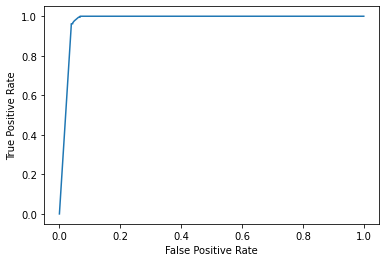

In [114]:
## get test parameters
print('-'*20)
print("Confusion matrix on test set is: ")
print(metrics.confusion_matrix(y_test, y_test_pred))
print('-'*20)
print('-'*20)
print("Performance metrics on test set is: ")
print ("Precision is: ", metrics.precision_score(y_test, y_test_pred))
print ("Recall is: ", metrics.recall_score(y_test, y_test_pred))
print ("Accuracy is: ", metrics.accuracy_score(y_test, y_test_pred))
print ("F1 score is: ", metrics.f1_score(y_test, y_test_pred))
print('-'*20)

print('-'*20)
print("ROC curve on test set is: ")
y_test_pred_proba = clf.predict_proba(X_test)[::,1]
# y_test_pred_proba = clf.decision_function(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Question 12

Trend between embedding size and accuracy

In [115]:
embed_size = [50,100,200,300]

In [116]:
clf = LogisticRegression(penalty = 'none',max_iter=10000, random_state=42)
# clf = SVC(kernel='linear', C=10, random_state=42)
label_encoder = LabelEncoder()

## label encoding
y_train = label_encoder.fit_transform(train['root_label'])
y_test = label_encoder.transform(test['root_label'])

## report test accuracy on different embedding size
accuracy = []
accuracy_train = []
for size in embed_size:
    
    embeddings_dict = {}
    with open("glove/glove.6B."+ str(size)+"d.txt", 'r') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], "float32")
            embeddings_dict[word] = vector
    
    X_train = data_to_feature_mapping(train, embeddings_dict, size)
    model = clf.fit(X_train, y_train)

    X_test = data_to_feature_mapping(test,embeddings_dict, size)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
    accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))

In [117]:
accuracy

[0.9566265060240964,
 0.9518072289156626,
 0.9662650602409638,
 0.9662650602409638]

In [118]:
accuracy_train

[0.9480989740494871,
 0.9837054918527459,
 0.9981894990947495,
 0.9981894990947495]

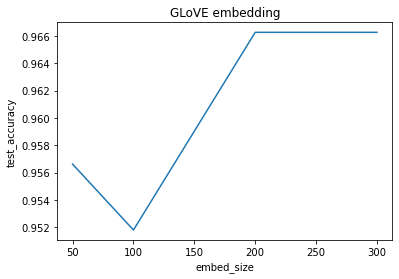

In [119]:
# plotting the explained variance ratio across number of components
plt.plot(embed_size, accuracy)
plt.xlabel('embed_size')
plt.ylabel('test_accuracy')
plt.title('GLoVE embedding')
plt.savefig('glove_embed.png')
plt.show()

#### Question 13

Visualize using UMAP

In [120]:
import umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [121]:
size = 300
embeddings_dict = {}
with open("glove/glove.6B."+ str(size)+"d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

X_train = data_to_feature_mapping(train, embeddings_dict, size)

reducer = umap.UMAP()
scaled_data = StandardScaler().fit_transform(X_train)
embedding = reducer.fit_transform(scaled_data)
embedding.shape

(1657, 2)

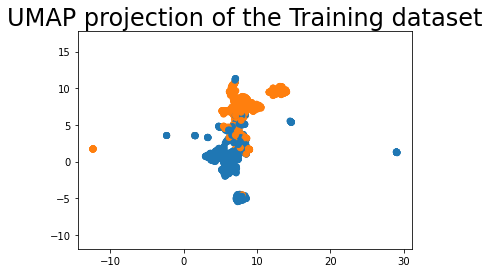

In [122]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in train.root_label.map({"sports":0, "climate":1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Training dataset', fontsize=24)
plt.savefig("umap_train.png")

In [123]:
rand_data = np.random.rand(1657,300)

In [124]:
reducer = umap.UMAP()
scaled_data_rand = StandardScaler().fit_transform(rand_data)
embedding_rand = reducer.fit_transform(scaled_data_rand)
embedding_rand.shape

(1657, 2)

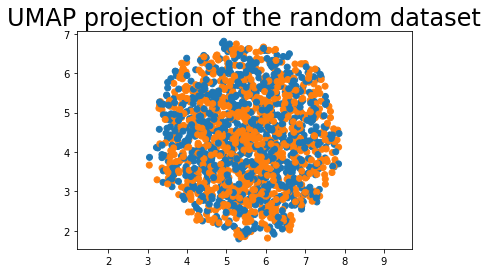

In [125]:
plt.scatter(
    embedding_rand[:, 0],
    embedding_rand[:, 1],
    c=[sns.color_palette()[x] for x in train.root_label.map({"sports":0, "climate":1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the random dataset', fontsize=24)
plt.savefig("umap_random.png")